In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation

In [2]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
team_dict = {i+1:consistent_teams[i] for i in range(len(consistent_teams))}
team_dict

{1: 'Kolkata Knight Riders',
 2: 'Chennai Super Kings',
 3: 'Rajasthan Royals',
 4: 'Mumbai Indians',
 5: 'Kings XI Punjab',
 6: 'Royal Challengers Bangalore',
 7: 'Delhi Daredevils',
 8: 'Sunrisers Hyderabad'}

In [3]:
total = []

for main in range(1,90):
    for i in range(5,20):
        temp = []
        for j in range(1,6):
            temp.append(float(str(i)+'.'+str(j)))

        total.append(temp)
    
total = sum(total,[])
overs = total[:6000]
random.shuffle(overs)

In [4]:
bat_team_random = [random.randint(1,8) for i in range(1,6001)]
bowl_team_random = [random.randint(1,8) for i in range(1,6001)]
current_runs = [random.randint(20,100) for i in range(1,6001)]
current_wickets = [random.randint(0,10) for i in range(1,6001)]
overs = [random.randint(5,20) for i in range(1,6001)]
total_runs = [random.randint(50,300) for i in range(1,6001)]


In [5]:
data =  pd.DataFrame(bat_team_random,columns=['Batting Team'])
data['Bowling Team'] = bowl_team_random
data['Current Runs'] = current_runs
data['Current Wickets'] = current_wickets
data['Current Overs'] = overs
data['Total Runs'] = total_runs
data.head()

,Batting Team,Bowling Team,Current Runs,Current Wickets,Current Overs,Total Runs
0,2,8,73,5,12,112
1,4,4,100,0,12,144
2,7,3,59,5,19,124
3,7,5,62,3,9,207
4,2,1,87,0,9,70


In [6]:
data['Batting Team'] = data['Batting Team'].map(team_dict)
data['Bowling Team'] = data['Bowling Team'].map(team_dict)
data.head()

,Batting Team,Bowling Team,Current Runs,Current Wickets,Current Overs,Total Runs
0,Chennai Super Kings,Sunrisers Hyderabad,73,5,12,112
1,Mumbai Indians,Mumbai Indians,100,0,12,144
2,Delhi Daredevils,Rajasthan Royals,59,5,19,124
3,Delhi Daredevils,Kings XI Punjab,62,3,9,207
4,Chennai Super Kings,Kolkata Knight Riders,87,0,9,70


In [7]:
## 1st condition==> Batting team must not be same as Bowling team XD:)

data = data[data['Batting Team']!=data['Bowling Team']]

## Condition2 : Total Runs must always be >=Current Runs!

data = data[data['Total Runs']>=data['Current Runs']]

data.head()

,Batting Team,Bowling Team,Current Runs,Current Wickets,Current Overs,Total Runs
0,Chennai Super Kings,Sunrisers Hyderabad,73,5,12,112
2,Delhi Daredevils,Rajasthan Royals,59,5,19,124
3,Delhi Daredevils,Kings XI Punjab,62,3,9,207
5,Delhi Daredevils,Mumbai Indians,56,3,6,118
6,Sunrisers Hyderabad,Kings XI Punjab,63,9,6,139


In [8]:
data.shape

(4934, 6)

In [9]:
temp1 = data.copy()
temp2 = data.copy()

In [10]:
remove = temp1[(temp1['Current Runs']<=100)&(temp1['Current Wickets']>=5)&(temp1['Total Runs']>=200)]
temp1 = pd.concat([temp1,remove,remove]).drop_duplicates(keep=False)
remove2 = temp1[(temp1['Current Overs']>=15)&(temp1['Total Runs']>=200)&(temp1['Current Runs']<=50)]
temp1 = pd.concat([temp1,remove2,remove2]).drop_duplicates(keep = False)

In [11]:
temp1.shape

(3676, 6)

In [12]:
remove = temp1[(temp1['Current Wickets']==10)]
temp1 = pd.concat([temp1,remove,remove]).drop_duplicates(keep = False)
temp1.shape

(3395, 6)

In [13]:
temp1.head()

,Batting Team,Bowling Team,Current Runs,Current Wickets,Current Overs,Total Runs
0,Chennai Super Kings,Sunrisers Hyderabad,73,5,12,112
2,Delhi Daredevils,Rajasthan Royals,59,5,19,124
3,Delhi Daredevils,Kings XI Punjab,62,3,9,207
5,Delhi Daredevils,Mumbai Indians,56,3,6,118
6,Sunrisers Hyderabad,Kings XI Punjab,63,9,6,139


In [14]:
remove = temp1[(temp1['Current Runs']<=100)&(temp1['Current Overs']>=15)]
temp1 = pd.concat([temp1,remove,remove]).drop_duplicates(keep=False)
temp1.head()

,Batting Team,Bowling Team,Current Runs,Current Wickets,Current Overs,Total Runs
0,Chennai Super Kings,Sunrisers Hyderabad,73,5,12,112
3,Delhi Daredevils,Kings XI Punjab,62,3,9,207
5,Delhi Daredevils,Mumbai Indians,56,3,6,118
6,Sunrisers Hyderabad,Kings XI Punjab,63,9,6,139
7,Chennai Super Kings,Kolkata Knight Riders,26,3,7,129


In [15]:
data = temp1.copy()
num_vars = data.select_dtypes(include=['int64','float64']).columns
cat_vars = data.select_dtypes(include=['object']).columns
num_vars,cat_vars

(Index(['Current Runs', 'Current Wickets', 'Current Overs', 'Total Runs'], dtype='object'),
 Index(['Batting Team', 'Bowling Team'], dtype='object'))

In [16]:
temp = data.copy()
temp = pd.get_dummies(temp,columns=['Batting Team', 'Bowling Team','Current Wickets', 'Current Overs'])
temp.head()

,Current Runs,Total Runs,Batting Team_Chennai Super Kings,Batting Team_Delhi Daredevils,Batting Team_Kings XI Punjab,Batting Team_Kolkata Knight Riders,Batting Team_Mumbai Indians,Batting Team_Rajasthan Royals,Batting Team_Royal Challengers Bangalore,Batting Team_Sunrisers Hyderabad,...,Current Overs_5,Current Overs_6,Current Overs_7,Current Overs_8,Current Overs_9,Current Overs_10,Current Overs_11,Current Overs_12,Current Overs_13,Current Overs_14
0,73,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,62,207,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,56,118,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,63,139,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,26,129,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
temp.columns

Index(['Current Runs', 'Total Runs', 'Batting Team_Chennai Super Kings',
       'Batting Team_Delhi Daredevils', 'Batting Team_Kings XI Punjab',
       'Batting Team_Kolkata Knight Riders', 'Batting Team_Mumbai Indians',
       'Batting Team_Rajasthan Royals',
       'Batting Team_Royal Challengers Bangalore',
       'Batting Team_Sunrisers Hyderabad', 'Bowling Team_Chennai Super Kings',
       'Bowling Team_Delhi Daredevils', 'Bowling Team_Kings XI Punjab',
       'Bowling Team_Kolkata Knight Riders', 'Bowling Team_Mumbai Indians',
       'Bowling Team_Rajasthan Royals',
       'Bowling Team_Royal Challengers Bangalore',
       'Bowling Team_Sunrisers Hyderabad', 'Current Wickets_0',
       'Current Wickets_1', 'Current Wickets_2', 'Current Wickets_3',
       'Current Wickets_4', 'Current Wickets_5', 'Current Wickets_6',
       'Current Wickets_7', 'Current Wickets_8', 'Current Wickets_9',
       'Current Overs_5', 'Current Overs_6', 'Current Overs_7',
       'Current Overs_8', 'Curre

In [18]:
temp = temp[['Batting Team_Chennai Super Kings', 'Batting Team_Delhi Daredevils',
       'Batting Team_Kings XI Punjab', 'Batting Team_Kolkata Knight Riders',
       'Batting Team_Mumbai Indians', 'Batting Team_Rajasthan Royals',
       'Batting Team_Royal Challengers Bangalore',
       'Batting Team_Sunrisers Hyderabad', 'Bowling Team_Chennai Super Kings',
       'Bowling Team_Delhi Daredevils', 'Bowling Team_Kings XI Punjab',
       'Bowling Team_Kolkata Knight Riders', 'Bowling Team_Mumbai Indians',
       'Bowling Team_Rajasthan Royals',
       'Bowling Team_Royal Challengers Bangalore',
       'Bowling Team_Sunrisers Hyderabad','Current Wickets_0',
       'Current Wickets_1', 'Current Wickets_2', 'Current Wickets_3',
       'Current Wickets_4', 'Current Wickets_5', 'Current Wickets_6',
       'Current Wickets_7', 'Current Wickets_8', 'Current Wickets_9',
       'Current Overs_5', 'Current Overs_6', 'Current Overs_7',
       'Current Overs_8', 'Current Overs_9','Current Overs_10',
       'Current Overs_11', 'Current Overs_12', 'Current Overs_13',
       'Current Overs_14','Current Runs','Total Runs']]
temp.head()

,Batting Team_Chennai Super Kings,Batting Team_Delhi Daredevils,Batting Team_Kings XI Punjab,Batting Team_Kolkata Knight Riders,Batting Team_Mumbai Indians,Batting Team_Rajasthan Royals,Batting Team_Royal Challengers Bangalore,Batting Team_Sunrisers Hyderabad,Bowling Team_Chennai Super Kings,Bowling Team_Delhi Daredevils,...,Current Overs_7,Current Overs_8,Current Overs_9,Current Overs_10,Current Overs_11,Current Overs_12,Current Overs_13,Current Overs_14,Current Runs,Total Runs
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,73,112
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,62,207
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,56,118
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,63,139
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,26,129


In [19]:
temp.shape

(2223, 38)

In [20]:
test = temp['Total Runs']
train = temp.drop(['Total Runs'],axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size = 0.2)
X_train.shape,X_test.shape

((1778, 37), (445, 37))

In [22]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [23]:
X_train_mm.shape,X_test_mm.shape

((1778, 37), (445, 37))

## ANN Implementation

In [24]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,input_shape= (37,),activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'linear')
])

model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(learning_rate=(1e-3)),
             metrics=['mse'])

history = model.fit(X_train_mm,y_train,epochs=1000,verbose=0)


Text(0, 0.5, 'Metric')

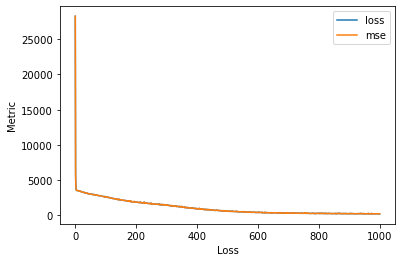

In [25]:
pd.DataFrame(history.history).plot()
plt.xlabel('Loss')
plt.ylabel('Metric')

In [26]:
model.evaluate(X_test_mm,y_test)

14/14 [==============================] - 0s 855us/step - loss: 8622.8818 - mse: 8622.8818


[8622.8818359375, 8622.8818359375]

In [27]:
train_np = np.array(train)
train_np = mm.transform(train_np)
train_np

array([[1.    , 0.    , 0.    , ..., 0.    , 0.    , 0.6625],
       [0.    , 1.    , 0.    , ..., 0.    , 0.    , 0.525 ],
       [0.    , 1.    , 0.    , ..., 0.    , 0.    , 0.45  ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.925 ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.525 ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.375 ]])

In [28]:
predictions = model.predict(train_np)
predictions

array([[109.98301],
       [180.98824],
       [129.66507],
       ...,
       [318.56714],
       [176.84035],
       [106.34928]], dtype=float32)

In [29]:
temp['ANN prediction'] = predictions
temp.head()

,Batting Team_Chennai Super Kings,Batting Team_Delhi Daredevils,Batting Team_Kings XI Punjab,Batting Team_Kolkata Knight Riders,Batting Team_Mumbai Indians,Batting Team_Rajasthan Royals,Batting Team_Royal Challengers Bangalore,Batting Team_Sunrisers Hyderabad,Bowling Team_Chennai Super Kings,Bowling Team_Delhi Daredevils,...,Current Overs_8,Current Overs_9,Current Overs_10,Current Overs_11,Current Overs_12,Current Overs_13,Current Overs_14,Current Runs,Total Runs,ANN prediction
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,73,112,109.983009
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,62,207,180.988235
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,118,129.665070
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,63,139,138.661972
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26,129,137.104691


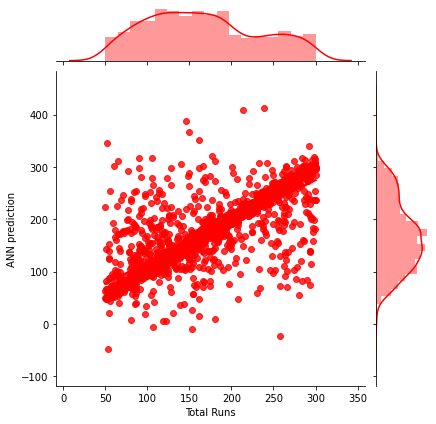

In [30]:
sn.jointplot(data=temp,x = 'Total Runs',y = 'ANN prediction',kind='reg',color='red')

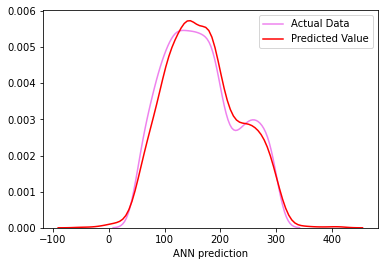

In [31]:
sn.distplot(temp['Total Runs'],hist = False,kde=True,color='violet',label = 'Actual Data')
sn.distplot(temp['ANN prediction'],hist = False,kde=True,color='red',label = 'Predicted Value')
plt.legend()
plt.show()

In [32]:
def getround(x):
    return int(x)

temp['ANN prediction'] = temp['ANN prediction'].apply(lambda x:getround(x))


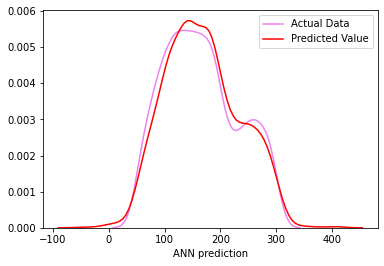

In [33]:
sn.distplot(temp['Total Runs'],hist = False,kde=True,color='violet',label = 'Actual Data')
sn.distplot(temp['ANN prediction'],hist = False,kde=True,color='red',label = 'Predicted Value')
plt.legend()
plt.show()

In [34]:
temp.head()

,Batting Team_Chennai Super Kings,Batting Team_Delhi Daredevils,Batting Team_Kings XI Punjab,Batting Team_Kolkata Knight Riders,Batting Team_Mumbai Indians,Batting Team_Rajasthan Royals,Batting Team_Royal Challengers Bangalore,Batting Team_Sunrisers Hyderabad,Bowling Team_Chennai Super Kings,Bowling Team_Delhi Daredevils,...,Current Overs_8,Current Overs_9,Current Overs_10,Current Overs_11,Current Overs_12,Current Overs_13,Current Overs_14,Current Runs,Total Runs,ANN prediction
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,73,112,109
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,62,207,180
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,56,118,129
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,63,139,138
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26,129,137


In [35]:
temp.columns

Index(['Batting Team_Chennai Super Kings', 'Batting Team_Delhi Daredevils',
       'Batting Team_Kings XI Punjab', 'Batting Team_Kolkata Knight Riders',
       'Batting Team_Mumbai Indians', 'Batting Team_Rajasthan Royals',
       'Batting Team_Royal Challengers Bangalore',
       'Batting Team_Sunrisers Hyderabad', 'Bowling Team_Chennai Super Kings',
       'Bowling Team_Delhi Daredevils', 'Bowling Team_Kings XI Punjab',
       'Bowling Team_Kolkata Knight Riders', 'Bowling Team_Mumbai Indians',
       'Bowling Team_Rajasthan Royals',
       'Bowling Team_Royal Challengers Bangalore',
       'Bowling Team_Sunrisers Hyderabad', 'Current Wickets_0',
       'Current Wickets_1', 'Current Wickets_2', 'Current Wickets_3',
       'Current Wickets_4', 'Current Wickets_5', 'Current Wickets_6',
       'Current Wickets_7', 'Current Wickets_8', 'Current Wickets_9',
       'Current Overs_5', 'Current Overs_6', 'Current Overs_7',
       'Current Overs_8', 'Current Overs_9', 'Current Overs_10',
    

In [37]:
from tensorflow.keras.models import load_model

In [38]:
new_model = load_model('iplmodel.h5')

In [39]:
new_predictions = new_model.predict(train_np)

In [40]:
new_predictions

array([[109.98301],
       [180.98824],
       [129.66507],
       ...,
       [318.56714],
       [176.84035],
       [106.34928]], dtype=float32)